# 🎮 Data Mining Analysis of the Global Mobile Game Market  
## 📌 Mid-Term Project Review  
**Author**: Ji Weng  
**Last Updated**: 2025/03/23  

---

## 📁 Data Sources

**Dataset Link**:  
🔗 [https://github.com/ponyo2024/mobile_game_market_analysis](https://github.com/ponyo2024/mobile_game_market_analysis)

This project relies on third-party data platforms to provide accurate and comprehensive mobile gaming statistics, specifically:

- **Sensor Tower**:  
  Used to obtain global mobile game downloads and revenue data, including breakdowns by region and game category.  
  Sensor Tower is widely recognized in the industry as the largest and most reliable third-party data intelligence platform for mobile apps.

> All raw data used in this project was directly exported from Sensor Tower in CSV format and then cleaned and preprocessed for analysis.



## 📊 Overall Analysis Plan

---

### 1. Global Macro Data [Completed✅]

- Analyze the global trends in mobile game downloads and revenue over the past five years.  
- Analyze the top 21 GDP countries to understand:
  - Their changes in downloads and revenue (2020–2024)
  - Their share in the global market


### 2. Country Clustering [Completed✅]

Two clustering approaches were used:

-  By 5-year trends in downloads and revenue per country  
-  By aggregated genre data for each country in 2024


### 3. In-Depth Analysis of Key Countries [In Progress]

Focus on key markets and distinctive countries.  
Example: United States

- What is the US’s share of global downloads and revenue?  
- Which game genres perform better in the US?  
- Analyze other relevant features and trends


### 4. App Clustering & Genre Correlation [In Progress]

- Cluster apps based on core metrics:
  - Active users  
  - Revenue per download (RPD)

- Analyze how these clusters relate to game genres


### 5. Predictive Analysis [Not Started]

- Forecast 2025 downloads and revenue based on macro trends  
- Predict performance of specific game types using:
  - Country clusters  
  - App clusters


## 🛠️ Further Work

---
### 1. Refine and Organize Existing Analysis Charts and Data

- Streamline the analysis by **removing segments** with weak correlations or limited value to conclusions.  
- Focus on a **clearer and more concise** presentation while **retaining key insights and findings**.


### 2. Continue In-Depth Analysis of Individual Countries

- Prioritize markets of strategic interest to the industry, such as:  
  - 🇺🇸 **United States**  
  - 🇯🇵 **Japan**  
  - 🇨🇳 **China**  
- Also include countries with unique characteristics like:  
  - 🇮🇳 **India**  
  - 🇧🇷 **Brazil**


### 3. Further Refine Country Clustering Analysis

- **Objective**: Provide a **macro-level view** of market similarities.  
- Support **global publishing strategy** with actionable segmentation insights.


### 4. Continue Refining App Clustering

- **Objective**: Go beyond traditional game genre labels by clustering based on:  
  - 📊 **Active users**  
  - 💰 **Revenue performance**  
- This can reveal **revenue-driven product types** and offer reference for **future game development**.

### 5. Complete Predictive Analysis at Both Country and App Levels

- **Objective**: Deliver **actionable forecasts** for future mobile game performance.  
- Provide insights that support **strategic planning** and **revenue projections**.


---

# 📌 PART 1： Global Macro Data

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import chardet

In [2]:
# Set Chinese fonts to avoid garbled Chinese characters
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = r'C:\Users\selma\Desktop\game_trend\downloads_2022.csv'

In [3]:
downloads_2020 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\downloads_2020.csv', encoding='utf-16',sep='\t')
downloads_2021 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\downloads_2021.csv', encoding='utf-16',sep='\t')
downloads_2022 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\downloads_2022.csv', encoding='utf-16',sep='\t')
downloads_2023 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\downloads_2023.csv', encoding='utf-16',sep='\t')
downloads_2024 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\downloads_2024.csv', encoding='utf-16',sep='\t')

revenue_2020 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\revenue_2020.csv', encoding='utf-16',sep='\t')
revenue_2021 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\revenue_2021.csv', encoding='utf-16',sep='\t')
revenue_2022 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\revenue_2022.csv', encoding='utf-16',sep='\t')
revenue_2023 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\revenue_2023.csv', encoding='utf-16',sep='\t')
revenue_2024 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\revenue_2024.csv', encoding='utf-16',sep='\t')

In [4]:
# Data preprocessing (aggregating downloads and revenue)
total_downloads = pd.DataFrame({
    'Year': ['2020', '2021','2022', '2023', '2024'],
    'Downloads': [downloads_2020['Downloads (Absolute)'].sum(), downloads_2021['Downloads (Absolute)'].sum(), downloads_2022['Downloads (Absolute)'].sum(), downloads_2023['Downloads (Absolute)'].sum(), downloads_2024['Downloads (Absolute)'].sum()]
})


total_revenue = pd.DataFrame({
    'Year': ['2020', '2021','2022', '2023', '2024'],
    'Revenue': [revenue_2020['Revenue (Absolute, $)'].sum(), revenue_2021['Revenue (Absolute, $)'].sum(), revenue_2022['Revenue (Absolute, $)'].sum(), revenue_2023['Revenue (Absolute, $)'].sum(), revenue_2024['Revenue (Absolute, $)'].sum()]
})

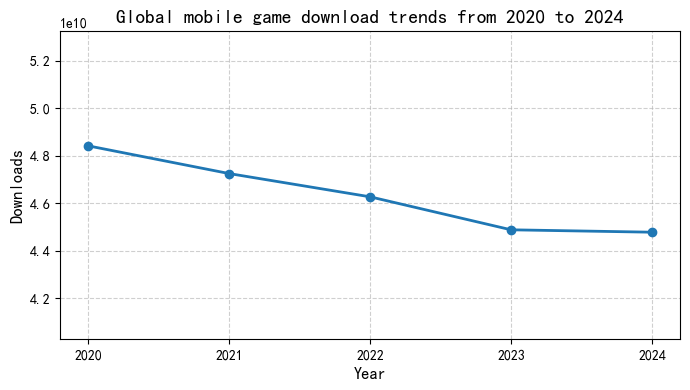

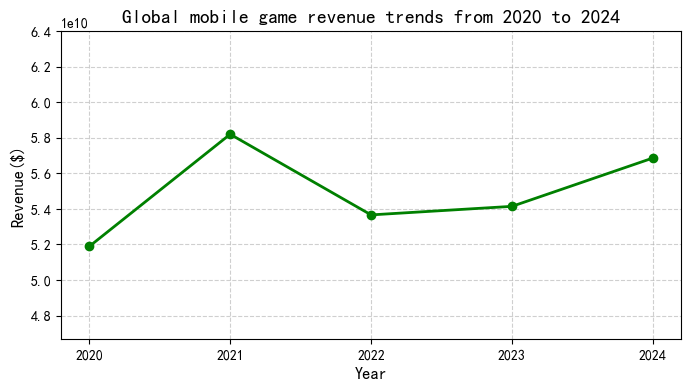

In [5]:
# Download trend visualization
plt.figure(figsize=(8, 4))
plt.plot(total_downloads['Year'], total_downloads['Downloads'], marker='o', linestyle='-', linewidth=2)
plt.title('Global mobile game download trends from 2020 to 2024', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Downloads', fontsize=12)
plt.ylim(total_downloads['Downloads'].min() * 0.9, total_downloads['Downloads'].max() * 1.1)  # Adjust the y-axis range 
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Revenue Trend Visualization
plt.figure(figsize=(8, 4))
plt.plot(total_revenue['Year'], total_revenue['Revenue'], marker='o', linestyle='-', linewidth=2, color='green')
plt.title('Global mobile game revenue trends from 2020 to 2024', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue($)', fontsize=12)
plt.ylim(total_revenue['Revenue'].min() * 0.9, total_revenue['Revenue'].max() * 1.1)  # Adjust the y-axis range 
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 🌍 Discussion -- Global Trends: Downloads vs. Revenue (2020–2024)

- **Global mobile game downloads** have shown a **steady decline** from 2020 to 2024, decreasing from nearly 4.9 billion to around 4.5 billion annually.  
  📉 This trend may reflect market saturation or a shift in user behavior.

- In contrast, **global mobile game revenue** has remained relatively **stable**, with fluctuations between 2020 and 2024.  
  📈 Despite fewer downloads, **revenue rebounded in 2024**, indicating higher monetization efficiency or a focus on high-paying users.

- The divergence between downloads and revenue suggests a possible **transition from growth to optimization**, where the industry focuses more on **user value** rather than user volume.

> ✅ Key insight: Even with declining downloads, the mobile gaming market remains strong in revenue performance — highlighting the importance of monetization strategies.


### Most Popular Country of the most Download Apps
Here, we analyze the top 10,000 most downloaded apps globally over the past five years and identify the country with the highest number of downloads for each app.

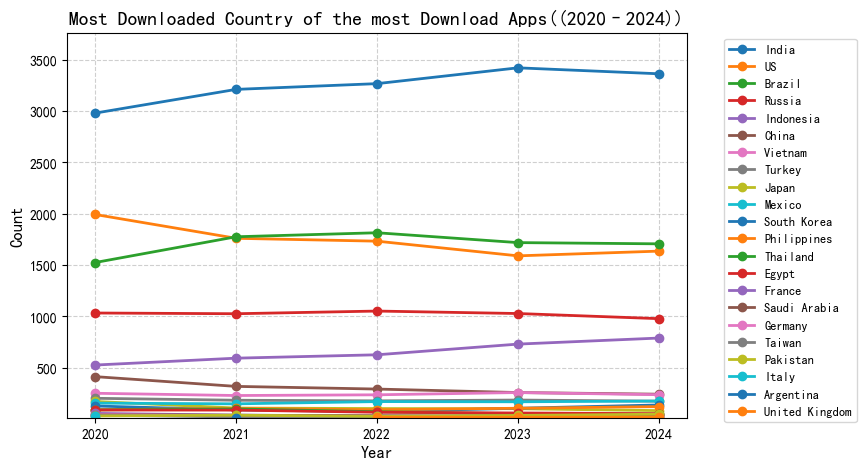

In [6]:
# Extract the "Most Popular Country by Downloads" column and count the top 20 countries
def get_top_20_countries(data, year):
    country_counts = Counter(data['Most Popular Country by Downloads'])
    top_20 = country_counts.most_common(20)  
    return [{'Year': year, 'Country': country, 'Count': count} for country, count in top_20]

# Calculate the top 20 popular countries for each year
yearly_top_countries = []
for year, data in zip(['2020', '2021', '2022', '2023', '2024'], [downloads_2020, downloads_2021, downloads_2022, downloads_2023, downloads_2024]):
    yearly_top_countries.extend(get_top_20_countries(data, year))

# Convert into DataFrame
yearly_top_countries_df = pd.DataFrame(yearly_top_countries)

# Visualize the changing trends of the top 20 countries
plt.figure(figsize=(8, 5))
for country in yearly_top_countries_df['Country'].unique():
    country_data = yearly_top_countries_df[yearly_top_countries_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Count'], marker='o', linestyle='-', linewidth=2, label=country)

plt.title('Most Downloaded Country of the most Download Apps((2020–2024))', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(yearly_top_countries_df['Count'].min() * 0.9, yearly_top_countries_df['Count'].max() * 1.1)  
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.show()

### 🧠 Discussion

- Over **3,000 apps** have **India** as the country with the highest number of downloads — making it a clear outlier and the undisputed No.1.

- Around **1,500 to 2,000 apps** have their top download numbers coming from the **United States** and **Brazil**, indicating that these two regions are either major **target markets** or have **large market sizes**.

- Over **1,000 apps** have **Russia** as their top download country, which is somewhat surprising.  
  Despite the war and app store sanctions, there hasn’t been a significant decline.  

### Most Downloaded Country for Top Revenue Apps (2020–2024)

Then, we analyze the top 10,000 highest-grossing apps globally over the past five years and identify the country with the highest number of downloads for each app.

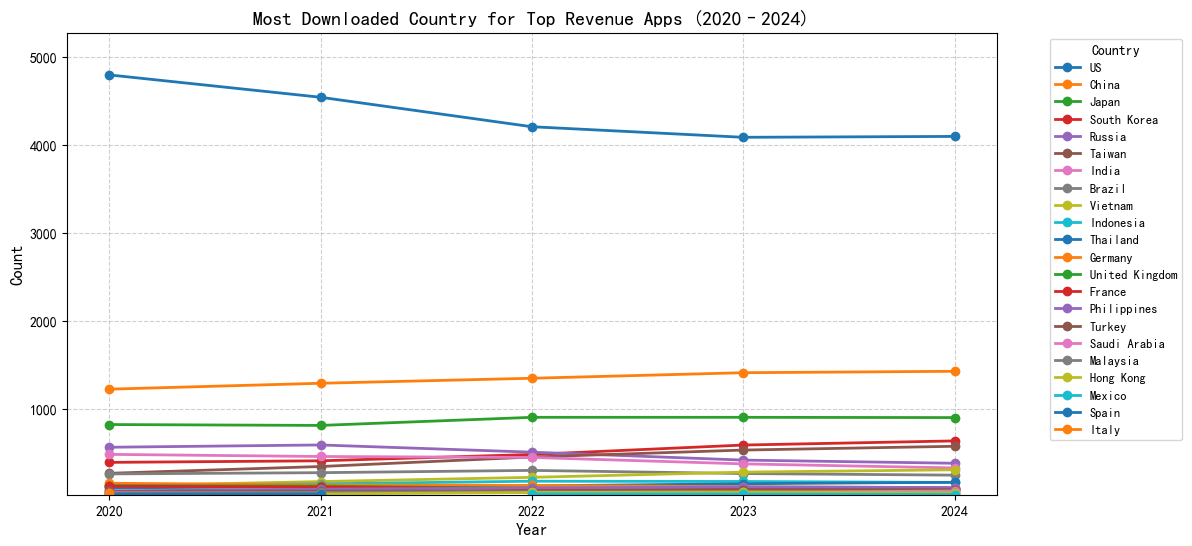

In [7]:
# # Extract the "Most Popular Country by Downloads" column and count the top 20 countries
yearly_top_countries_by_revenue = []
for year, data in zip(['2020', '2021', '2022', '2023', '2024'], [revenue_2020, revenue_2021, revenue_2022, revenue_2023, revenue_2024]):
    yearly_top_countries_by_revenue.extend(get_top_20_countries(data, year))

# covert into DataFrame
yearly_top_countries_by_revenue_df = pd.DataFrame(yearly_top_countries_by_revenue)

# Rearrange the data so that the legend is sorted by total number of times
total_counts = yearly_top_countries_by_revenue_df.groupby('Country')['Count'].sum()
sorted_countries = total_counts.sort_values(ascending=False).index.tolist()

# 7. 绘制折线图
plt.figure(figsize=(12, 6))
for country in sorted_countries:
    country_data = yearly_top_countries_by_revenue_df[yearly_top_countries_by_revenue_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Count'], marker='o', linestyle='-', linewidth=2, label=country)

plt.title('Most Downloaded Country for Top Revenue Apps (2020–2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.ylim(yearly_top_countries_by_revenue_df['Count'].min() * 0.9, yearly_top_countries_by_revenue_df['Count'].max() * 1.1)  
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.show()

### 🧠 Discussion
- In the **highest-grossing app rankings**, the **United States** stands out as the clear leader — for **over 4,000 apps**, the U.S. is the country with the highest number of downloads.  
- If available, it would be valuable to analyze the **yearly trend of the U.S. user acquisition (UA) share** to better understand its marketing dynamics.
- Notably, **European countries are largely absent** from this list.  

### Download and Revenue Trend by Country (2020-2024) 

  Country  Year  Downloads (Absolute)  Revenue (Absolute, $)
0      br  2020            3049581264           3.463250e+08
1      br  2021            2691608195           3.366365e+08
2      br  2022            2675738348           3.794712e+08
3      br  2023            2482231256           3.692128e+08
4      br  2024            2374956781           3.949682e+08
5      ca  2020             324968863           9.509761e+08
6      ca  2021             266508302           1.081947e+09
7      ca  2022             256061624           1.021888e+09
8      ca  2023             250078213           1.035326e+09
9      ca  2024             249729275           1.126704e+09


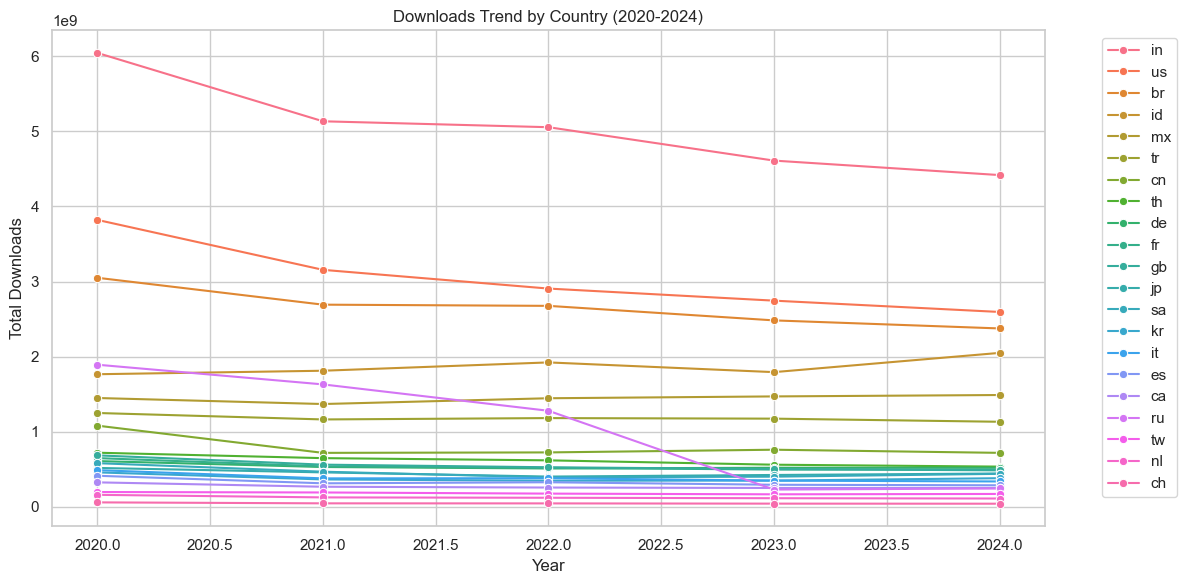

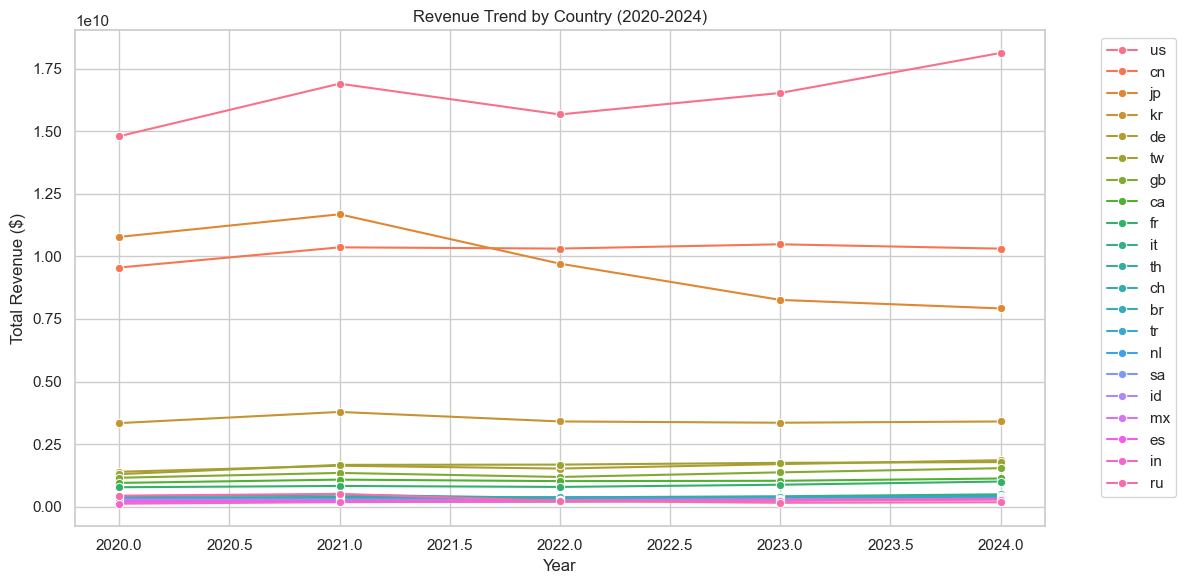

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import glob
import os


sns.set(style='whitegrid')

# data path
data_path = r"C:\Users\selma\Desktop\game_trend\country"
file_list = glob.glob(os.path.join(data_path, '*.csv'))

# combine data
all_country_data = pd.DataFrame()
for file in file_list:
    temp_df = pd.read_csv(file, encoding='utf-16', sep='\t')
    filename = os.path.basename(file)
    country, year = filename.replace('.csv', '').split('_')
    temp_df['Country'] = country
    temp_df['Year'] = int(year)
    all_country_data = pd.concat([all_country_data, temp_df], ignore_index=True)

# data aggregation
country_yearly = all_country_data.groupby(['Country', 'Year']).agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum'
}).reset_index()

# save to file
country_yearly.to_csv('21_countries_5year_summary.csv', index=False)

# display 
print(country_yearly.head(10))

# Sort by the latest year (2024)
latest_year = country_yearly['Year'].max()
country_order_downloads = country_yearly[country_yearly['Year'] == latest_year] \
    .sort_values('Downloads (Absolute)', ascending=False)['Country'].tolist()

country_order_revenue = country_yearly[country_yearly['Year'] == latest_year] \
    .sort_values('Revenue (Absolute, $)', ascending=False)['Country'].tolist()

# Line chart - Downloads
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_yearly, x='Year', y='Downloads (Absolute)', hue='Country',
             marker='o', hue_order=country_order_downloads)
plt.title('Downloads Trend by Country (2020-2024)')
plt.ylabel('Total Downloads')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Line Chart - Revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=country_yearly, x='Year', y='Revenue (Absolute, $)', hue='Country',
             marker='o', hue_order=country_order_revenue)
plt.title('Revenue Trend by Country (2020-2024)')
plt.ylabel('Total Revenue ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [9]:
# collect global data
global_data_path = r"C:\Users\selma\Desktop\game_trend\global_revenue"
global_files = glob.glob(os.path.join(global_data_path, '*.csv'))

# combine global data
global_data = pd.DataFrame()
for file in global_files:
    temp_df = pd.read_csv(file, encoding='utf-16', sep='\t')
    year = int(os.path.basename(file).replace('.csv', '').split('_')[-1])
    temp_df['Year'] = year
    global_data = pd.concat([global_data, temp_df], ignore_index=True)

# Global data annual summary
global_yearly = global_data.groupby('Year').agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum'
}).reset_index()

# calculate each country's share
merged_yearly = pd.merge(country_yearly.groupby('Year').sum().reset_index(), global_yearly,
                         on='Year', suffixes=('_21countries', '_global'))
merged_yearly['Download Share (%)'] = (merged_yearly['Downloads (Absolute)_21countries'] / merged_yearly['Downloads (Absolute)_global']) * 100
merged_yearly['Revenue Share (%)'] = (merged_yearly['Revenue (Absolute, $)_21countries'] / merged_yearly['Revenue (Absolute, $)_global']) * 100

merged_yearly.to_csv('merged_yearly_summary.csv', index=False)

In [10]:
# Calculate the proportion of each country in the world
country_global_share = pd.merge(country_yearly, global_yearly, on='Year', suffixes=('', '_global'))
country_global_share['Country Download Share (%)'] = (country_global_share['Downloads (Absolute)'] / country_global_share['Downloads (Absolute)_global']) * 100
country_global_share['Country Revenue Share (%)'] = (country_global_share['Revenue (Absolute, $)'] / country_global_share['Revenue (Absolute, $)_global']) * 100

# save to file
country_global_share.to_csv('country_global_share_summary.csv', index=False)

# 展示国家在全球的占比数据
print(country_global_share[['Country', 'Year', 'Country Download Share (%)', 'Country Revenue Share (%)']].head(10))

  Country  Year  Country Download Share (%)  Country Revenue Share (%)
0      br  2020                    9.705466                   0.667447
1      br  2021                   10.128051                   0.578455
2      br  2022                   10.544731                   0.707165
3      br  2023                   10.544945                   0.681941
4      br  2024                   10.197939                   0.694646
5      ca  2020                    1.034232                   1.832748
6      ca  2021                    1.002824                   1.859149
7      ca  2022                    1.009105                   1.904344
8      ca  2023                    1.062375                   1.912261
9      ca  2024                    1.072324                   1.981579


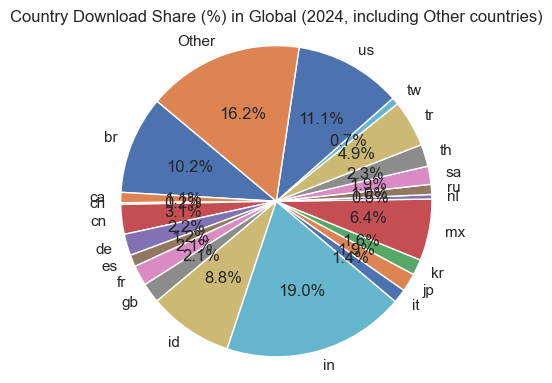

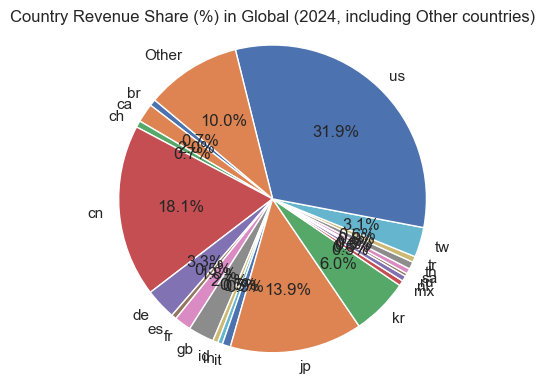

In [11]:
# # Construct data for other countries
latest_year_data = country_global_share[country_global_share['Year'] == latest_year].copy()
other_download_share = 100 - latest_year_data['Country Download Share (%)'].sum()
other_revenue_share = 100 - latest_year_data['Country Revenue Share (%)'].sum()
latest_year_data = pd.concat([
    latest_year_data,
    pd.DataFrame({
        'Country': ['Other'],
        'Country Download Share (%)': [other_download_share],
        'Country Revenue Share (%)': [other_revenue_share]
    })
], ignore_index=True)

# Pie chart showing the global share of downloads by country in 2024 (including other countries)
plt.figure(figsize=(5, 4))
plt.pie(latest_year_data['Country Download Share (%)'], labels=latest_year_data['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Country Download Share (%) in Global (2024, including Other countries)')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Pie chart showing the global share of each country's revenue in 2024 (including other countries)
plt.figure(figsize=(5, 4))
plt.pie(latest_year_data['Country Revenue Share (%)'], labels=latest_year_data['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Country Revenue Share (%) in Global (2024, including Other countries)')
plt.axis('equal')
plt.tight_layout()
plt.show()


   Country  gdp_2024_billion_usd  GDP Rank  Revenue (Absolute, $)  \
0       br                  2176      10.0           3.949682e+08   
1       ca                  2189       9.0           1.126704e+09   
2       ch                   999      19.0           3.958838e+08   
3       cn                 18533       2.0           1.030788e+10   
4       de                  4591       3.0           1.857998e+09   
5       es                  1647      14.0           3.006989e+08   
6       fr                  3131       7.0           1.005067e+09   
7       gb                  3495       6.0           1.539420e+09   
8       id                  1475      15.0           3.125260e+08   
9       in                  4105       5.0           2.830162e+08   
10      it                  2406       8.0           4.952388e+08   
11      jp                  4110       4.0           7.919844e+09   
12      kr                  1899      13.0           3.404450e+09   
13      mx                  2017  

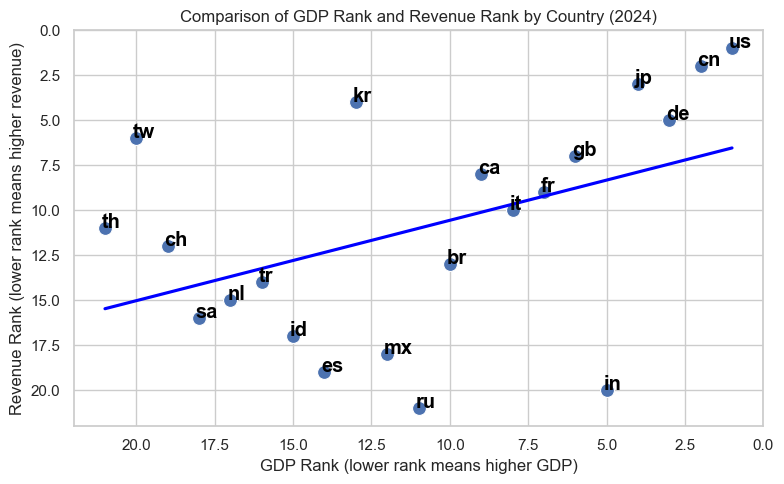

Spearman correlation (GDP rank vs Revenue rank): 0.45


In [12]:
# load GDP data
gdp_data = pd.read_csv(r"C:\Users\selma\Desktop\game_trend\country_gdp.csv")

# revenue vs GDP in 2024
latest_year = country_yearly['Year'].max()
latest_revenue_gdp = country_global_share[country_global_share['Year'] == latest_year][['Country', 'Revenue (Absolute, $)', 'Country Revenue Share (%)']]
latest_revenue_gdp = latest_revenue_gdp.merge(gdp_data, left_on='Country', right_on='country_code', how='left')

latest_revenue_gdp['GDP Rank'] = latest_revenue_gdp['gdp_2024_billion_usd'].rank(ascending=False)
latest_revenue_gdp['Revenue Rank'] = latest_revenue_gdp['Revenue (Absolute, $)'].rank(ascending=False)

# display data
print(latest_revenue_gdp[['Country', 'gdp_2024_billion_usd', 'GDP Rank', 'Revenue (Absolute, $)', 'Revenue Rank']])

# scatter plot
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=latest_revenue_gdp, x='GDP Rank', y='Revenue Rank', s=100)

for line in range(0, latest_revenue_gdp.shape[0]):
     plt.text(latest_revenue_gdp['GDP Rank'].iloc[line] + 0.1,
              latest_revenue_gdp['Revenue Rank'].iloc[line],
              latest_revenue_gdp['Country'].iloc[line],
              horizontalalignment='left',
              size='large', color='black', weight='semibold')

sns.regplot(data=latest_revenue_gdp, x='GDP Rank', y='Revenue Rank', scatter=False, ci=None, line_kws={"color":"blue"})

plt.title('Comparison of GDP Rank and Revenue Rank by Country (2024)')
plt.xlabel('GDP Rank (lower rank means higher GDP)')
plt.ylabel('Revenue Rank (lower rank means higher revenue)')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Calculate the Spearman correlation coefficient between GDP and income ranking
correlation = latest_revenue_gdp[['GDP Rank', 'Revenue Rank']].corr(method='spearman').iloc[0, 1]
print(f"Spearman correlation (GDP rank vs Revenue rank): {correlation:.2f}")

### 📈 Discussion: Relationship Between App Revenue and National GDP

The overall trend (represented by the **blue trend line** in the chart) shows that countries with **larger GDPs tend to have higher mobile app revenue**, indicating a **moderate positive correlation** (Spearman correlation coefficient = **0.45**).  
However, several countries deviate significantly from the trend line and are worth highlighting.


#### 🚩 Countries Performing Strongly in Both GDP and Revenue

- **United States (US)** and **China (CN)**  
  These two countries rank **1st and 2nd** in GDP respectively, and they also occupy the **top two positions in app revenue**.  
  This alignment suggests that the **large user base and strong spending power** driven by economic scale contribute significantly to mobile app market growth.

- **Japan (JP)** and **Germany (DE)**  
  Both countries show a close match between GDP and app revenue rankings — Japan ranks **3rd** in both, Germany ranks **4th** in both.  
  This reflects **mature markets** with strong **user willingness to pay**, consistent with their economic development levels.


#### ⚠️ Countries Significantly Above the Trend Line (Higher Revenue Than GDP Suggests)

- **South Korea (KR)**  
  Although not high in GDP rankings, Korea ranks **5th in app revenue**, far above what its GDP would suggest.  
  Possible reasons include a **highly developed gaming industry**, a **mobile-first culture**, **high internet penetration**, and strong **user monetization behavior**.

- **Taiwan (TW)**  
  Despite a relatively low GDP ranking, Taiwan ranks around **7th in revenue**, showing a **mature mobile gaming market** with strong user payment habits.


#### ⚠️ Countries Significantly Below the Trend Line (Lower Revenue Than GDP Suggests)

- **India (IN)**  
  India ranks around **5th in GDP**, but ranks **near the bottom in app revenue**.  
  This may be due to **low ARPU**, limited user willingness to pay, and lower **payment penetration**, despite the country’s massive population.

- **Russia (RU)**  
  Although it ranks **8th in GDP**, Russia is near the bottom in revenue rankings.  
  Potential reasons include economic challenges, regulatory issues, and low user purchasing power.

- **Spain (ES)** and **Mexico (MX)**  
  Similar to India and Russia, these countries have relatively high GDPs but **underperform in app revenue**, possibly due to **low user monetization**.


#### 🔍 Middle Zone (Aligned With Trend Line)

- **United Kingdom (GB)**, **France (FR)**, **Canada (CA)**, and **Italy (IT)**  
  These developed countries show a strong match between GDP and app revenue rankings, suggesting their **market size is well-aligned with economic scale**, and they possess **stable and mature app markets**.


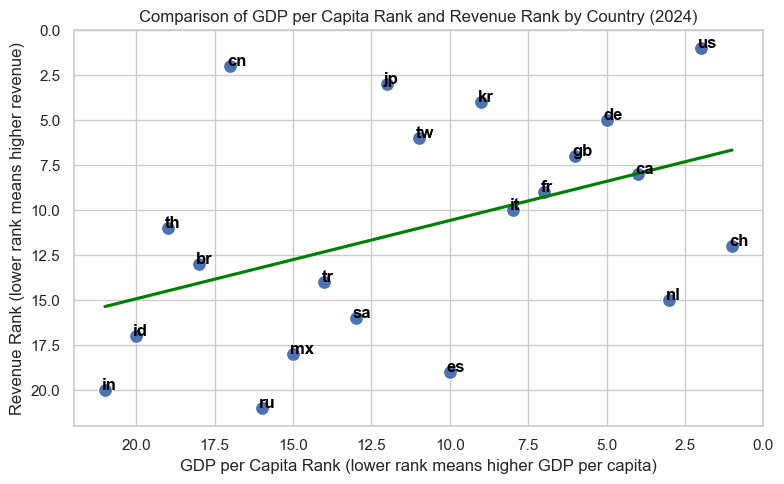

Spearman correlation (GDP per capita rank vs Revenue rank): 0.44


In [13]:
# Load GDP per capita data
gdp_per_capita_data = pd.read_csv(r"C:\Users\selma\Desktop\game_trend\country_gdp_per_capita.csv")
latest_revenue_gdp_per_capita = latest_revenue_gdp.merge(gdp_per_capita_data, left_on='Country', right_on='country_code', how='left')

# Comparison of GDP per capita and revenue ranking
latest_revenue_gdp_per_capita['GDP per Capita Rank'] = latest_revenue_gdp_per_capita['gdp_per_capita_2024_usd'].rank(ascending=False)

# Draw a scatter plot
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(data=latest_revenue_gdp_per_capita, x='GDP per Capita Rank', y='Revenue Rank', s=100)

for line in range(0, latest_revenue_gdp_per_capita.shape[0]):
     plt.text(latest_revenue_gdp_per_capita['GDP per Capita Rank'].iloc[line] + 0.1,
              latest_revenue_gdp_per_capita['Revenue Rank'].iloc[line],
              latest_revenue_gdp_per_capita['Country'].iloc[line],
              horizontalalignment='left',
              size='medium', color='black', weight='semibold')

sns.regplot(data=latest_revenue_gdp_per_capita, x='GDP per Capita Rank', y='Revenue Rank', scatter=False, ci=None, line_kws={"color":"green"})

plt.title('Comparison of GDP per Capita Rank and Revenue Rank by Country (2024)')
plt.xlabel('GDP per Capita Rank (lower rank means higher GDP per capita)')
plt.ylabel('Revenue Rank (lower rank means higher revenue)')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Calculate the Spearman correlation coefficient
correlation_pc = latest_revenue_gdp_per_capita[['GDP per Capita Rank', 'Revenue Rank']].corr(method='spearman').iloc[0, 1]
print(f"Spearman correlation (GDP per capita rank vs Revenue rank): {correlation_pc:.2f}")


# 📌 PART 2： Country Clustering

## Country Clustering approach #1: 
- By 5-year trends in downloads and revenue per country

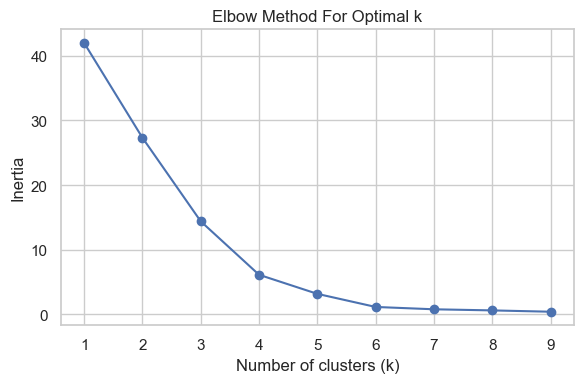

In [14]:
# load data
summary_df = pd.read_csv('21_countries_5year_summary.csv')

summary_total = summary_df.groupby('Country').agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum'
}).reset_index()

# Standardized features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(summary_total[['Downloads (Absolute)', 'Revenue (Absolute, $)']])

# Determining the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Drawing Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

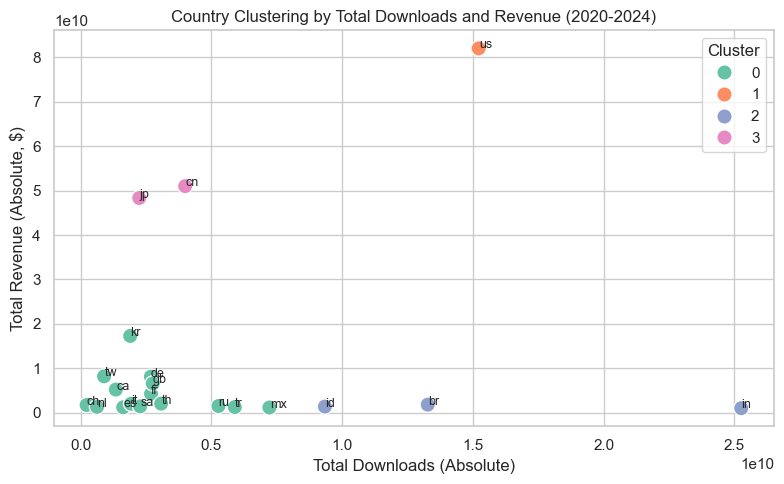

In [15]:
# KMeans clustering (select k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
summary_total['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Downloads (Absolute)', y='Revenue (Absolute, $)',
    hue='Cluster', data=summary_total, palette='Set2', s=120)

for i in range(summary_total.shape[0]):
    plt.text(
        summary_total['Downloads (Absolute)'][i]+1e7,
        summary_total['Revenue (Absolute, $)'][i],
        summary_total['Country'][i],
        fontsize=9)

plt.title('Country Clustering by Total Downloads and Revenue (2020-2024)')
plt.xlabel('Total Downloads (Absolute)')
plt.ylabel('Total Revenue (Absolute, $)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


### 🌍 Country Market Clustering Results (2020–2024)

| Cluster ID | Cluster Name              | Representative Countries            | Description                                                                 |
|------------|---------------------------|--------------------------------------|-----------------------------------------------------------------------------|
| Cluster 1  | **Global Titans**         | 🇺🇸 United States (US)               | Ranked No.1 globally in both downloads and revenue; well-developed ecosystem with both a large user base and strong purchasing power. |
| Cluster 3  | **Revenue Giants**        | 🇨🇳 China (CN), 🇯🇵 Japan (JP)        | Extremely high revenue, strong user willingness to pay, and mature mobile gaming culture; download volume not as high as mass-market countries. |
| Cluster 2  | **Mass Market Movers**    | 🇮🇳 India (IN), 🇧🇷 Brazil (BR), 🇮🇩 Indonesia (ID) | Massive download volumes but relatively low revenue; limited user spending power and habits; mainly ad-driven monetization. |
| Cluster 0  | **Balanced Performers**   | 🇰🇷 South Korea (KR), 🇩🇪 Germany (DE), 🇬🇧 United Kingdom (GB), etc. | Medium to high performance in both downloads and revenue; mature and stable markets with good user monetization but smaller scale than the "giants." |


## Country Clustering approach #2
- By aggregated genre data for each country in 2024

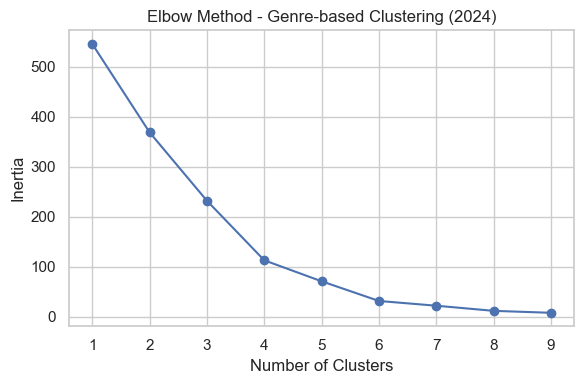

Game Genre  Cluster
Country            
br                2
ca                0
ch                0
cn                3
de                0
es                0
fr                0
gb                0
id                2
in                2
it                0
jp                3
kr                0
mx                0
nl                0
ru                0
sa                0
th                0
tr                0
tw                0
us                1


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import glob
import os

sns.set(style='whitegrid')

# import data
data_path = r"C:\Users\selma\Desktop\game_trend\country"
file_list = glob.glob(os.path.join(data_path, '*_2024.csv'))

# handle file only in year 2024
genre_data = pd.DataFrame()
for file in file_list:
    if '_2024' in file:
        temp_df = pd.read_csv(file, encoding='utf-16', sep='\t')
        country_code = os.path.basename(file).split('_')[0]
        temp_df['Country'] = country_code
        genre_data = pd.concat([genre_data, temp_df], ignore_index=True)

# Aggregate download and revenue data for each country and genre
genre_grouped = genre_data.groupby(['Country', 'Game Genre']).agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum'
}).reset_index()

# Pivot table: each row is a country, each column is the downloads or revenue of a different genre
download_pivot = genre_grouped.pivot(index='Country', columns='Game Genre', values='Downloads (Absolute)').fillna(0)
revenue_pivot = genre_grouped.pivot(index='Country', columns='Game Genre', values='Revenue (Absolute, $)').fillna(0)

# Combine download and revenue features (choose one or both)
features = pd.concat([download_pivot, revenue_pivot], axis=1, sort=False)

# standardization
genre_scaler = StandardScaler()
features_scaled = genre_scaler.fit_transform(features)

# Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Genre-based Clustering (2024)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

# Cluster analysis (assuming k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
genre_cluster_labels = kmeans.fit_predict(features_scaled)

# Save clustering results
genre_cluster_df = features.copy()
genre_cluster_df['Cluster'] = genre_cluster_labels
print(genre_cluster_df[['Cluster']])


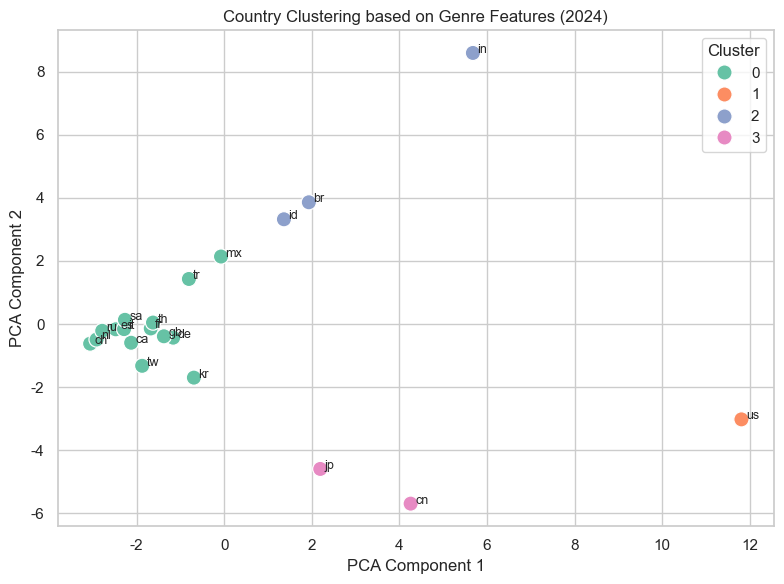

In [17]:
# # Visualization of clustering results (using the first two principal components for dimensionality reduction display)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=genre_cluster_labels,
    palette='Set2',
    s=120
)

for i, country in enumerate(features.index):
    plt.text(pca_result[i, 0] + 0.1, pca_result[i, 1], country, fontsize=9)

plt.title('Country Clustering based on Genre Features (2024)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

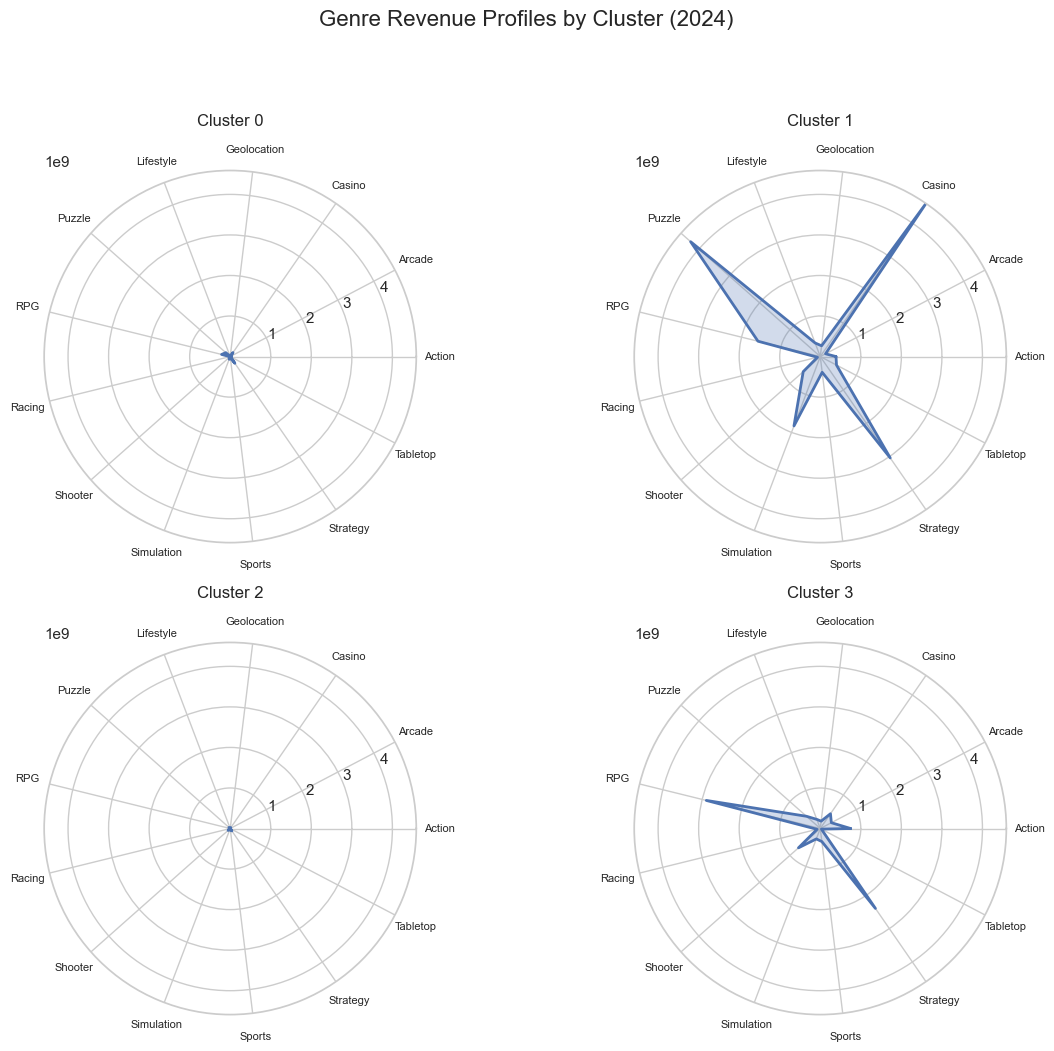

In [18]:
# =================== Radar chart showing the average distribution of each cluster group in each genre===================

# Extract cluster labels
features_with_cluster = features.copy()
features_with_cluster['Cluster'] = genre_cluster_labels

# Group by Cluster and calculate the mean of each genre (only revenue is taken)
revenue_features = revenue_pivot.copy()
revenue_features['Cluster'] = genre_cluster_labels
cluster_genre_mean = revenue_features.groupby('Cluster').mean()

# Calculate the maximum value among all values and use it as the uniform y-axis upper limit
max_value = cluster_genre_mean.values.max()


from math import pi

categories = list(cluster_genre_mean.columns)
N = len(categories)
num_clusters = len(cluster_genre_mean)

fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'polar': True})
axes = axes.flatten()

for idx, cluster_id in enumerate(cluster_genre_mean.index):
    values = cluster_genre_mean.loc[cluster_id].values.flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = axes[idx]
    ax.set_ylim(0, max_value)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster_id}')
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.set_title(f'Cluster {cluster_id}', y=1.1)

plt.suptitle('Genre Revenue Profiles by Cluster (2024)', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()



### 🎯 Differences in Genre Revenue Structure Across Clusters (Based on 2024 Data)

| Cluster   | Cluster Name       | Keywords             | Key Characteristics |
|-----------|--------------------|----------------------|----------------------|
| Cluster 0 | 🟦 Balanced Medium | Diverse but Mild     | Performance across all genres is relatively weak, with genre revenues clustered near the center. This indicates that countries in this group lack a distinct advantage in any specific genre. The distribution is even, but lacks standout revenue generators. |
| Cluster 1 | 🟩 Revenue Giant   | Dominant Across the Board | Clearly represents the U.S. as a standalone category. Revenues for genres like Puzzle, Casino, Strategy, and RPG are significantly higher than those in other clusters, showcasing strong monetization capabilities and high user willingness to pay. |
| Cluster 2 | 🟨 Light Volume Hybrid | Wide but Weak     | Shows some strength in Shooter and Strategy genres, but overall revenue remains low. Likely includes developing markets such as India, Indonesia, and Brazil, which are characterized by high download volumes but low monetization. |
| Cluster 3 | 🟥 East Hardcore    | Focused Depth        | Primarily composed of China and Japan, showing peak revenues in RPG and Strategy genres. Other genres remain at moderate to low levels, indicating a highly concentrated revenue structure that aligns with the preference for hardcore gameplay in these markets. |

---

### 📌 Summary

- **Cluster 1 (U.S.)**: Exhibits overwhelming dominance across almost all genres, reflecting a highly mature monetization environment.  
- **Cluster 3 (China & Japan)**: Strong focus on core, hardcore genres; classic powerhouses in RPG/SLG.  
- **Cluster 2 (India, Brazil, Indonesia, etc.)**: High downloads in certain genres, but low revenue — fragile monetization structure.  
- **Cluster 0 (European countries)**: Balanced genre structure but lacks standout performance; user preferences are likely diverse, with below-average ARPU.


# 📌 PART 3： In-Depth Analysis of Key Countries

## US the overall leader

In [19]:
# Set the path and read the US data for 2020-2024
us_path = r"C:\Users\selma\Desktop\game_trend\country"
us_files = [f for f in os.listdir(us_path) if f.startswith('us_20') and f.endswith('.csv')]

us_data = pd.DataFrame()
for file in us_files:
    year = file.split('_')[1].split('.')[0]
    df = pd.read_csv(os.path.join(us_path, file), encoding='utf-16', sep='\t')
    df['Year'] = int(year)
    us_data = pd.concat([us_data, df], ignore_index=True)

# Data cleaning: Process the Revenue column, remove the $ sign and convert to floating point numbers
us_data['Revenue (Absolute, $)'] = us_data['Revenue (Absolute, $)'].replace('[\$,]', '', regex=True).astype(float)

us_data['Downloads (Absolute)'] = us_data['Downloads (Absolute)'].replace('[,]', '', regex=True).astype(float)

us_data['RPD (All Time, WW)'] = us_data['RPD (All Time, WW)'].replace('[\$,]', '', regex=True).astype(float)

<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:21: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:21: SyntaxWarning: invalid escape sequence '\$'
C:\Users\selma\AppData\Local\Temp\ipykernel_18892\3535151245.py:15: SyntaxWarning: invalid escape sequence '\$'
  us_data['Revenue (Absolute, $)'] = us_data['Revenue (Absolute, $)'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\selma\AppData\Local\Temp\ipykernel_18892\3535151245.py:21: SyntaxWarning: invalid escape sequence '\$'
  us_data['RPD (All Time, WW)'] = us_data['RPD (All Time, WW)'].replace('[\$,]', '', regex=True).astype(float)


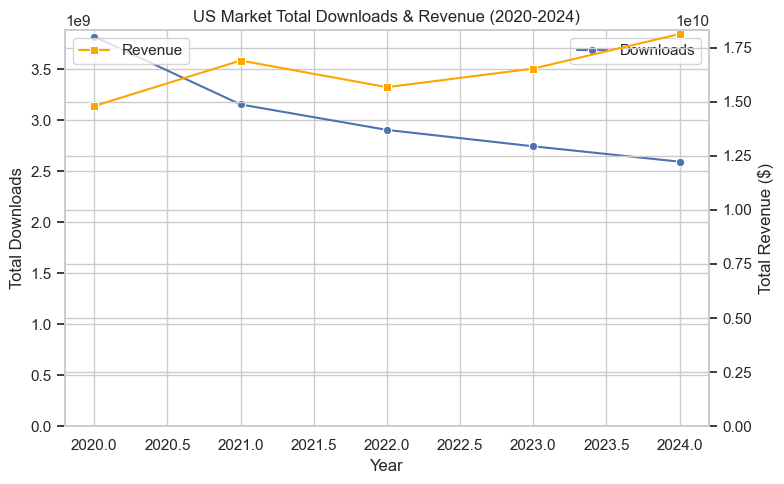

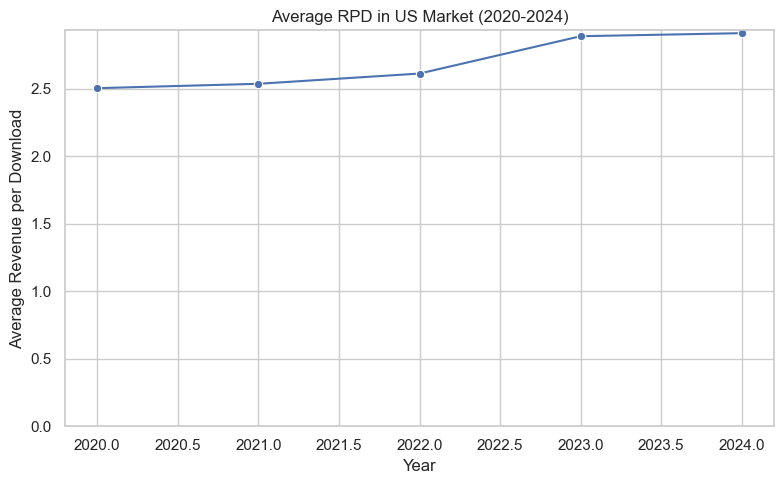

In [20]:
# ========== Overall trend analysis ==========

# Annual total statistics
total_stats = us_data.groupby('Year').agg({
    'Downloads (Absolute)': 'sum',
    'Revenue (Absolute, $)': 'sum',
    'RPD (All Time, WW)': 'mean'  
}).reset_index()

# Set a uniform chart size
fig_size = (8, 5)

# Drawing: Downloads and Revenue
fig, ax1 = plt.subplots(figsize=fig_size)
ax2 = ax1.twinx()

sns.lineplot(x='Year', y='Downloads (Absolute)', data=total_stats, marker='o', ax=ax1, label='Downloads')
sns.lineplot(x='Year', y='Revenue (Absolute, $)', data=total_stats, marker='s', ax=ax2, color='orange', label='Revenue')

# Set the Y axis start point to 0
ax1.set_ylim(0, ax1.get_ylim()[1])  
ax2.set_ylim(0, ax2.get_ylim()[1]) 

ax1.set_ylabel('Total Downloads')
ax2.set_ylabel('Total Revenue ($)')
ax1.set_title('US Market Total Downloads & Revenue (2020-2024)')
plt.tight_layout()
plt.show()

# RRPD Trends
plt.figure(figsize=fig_size)
sns_plot = sns.lineplot(x='Year', y='RPD (All Time, WW)', data=total_stats, marker='o')

# Set the Y axis start point to 0
plt.ylim(0, plt.ylim()[1]) 

plt.title('Average RPD in US Market (2020-2024)')
plt.ylabel('Average Revenue per Download')
plt.tight_layout()
plt.show()



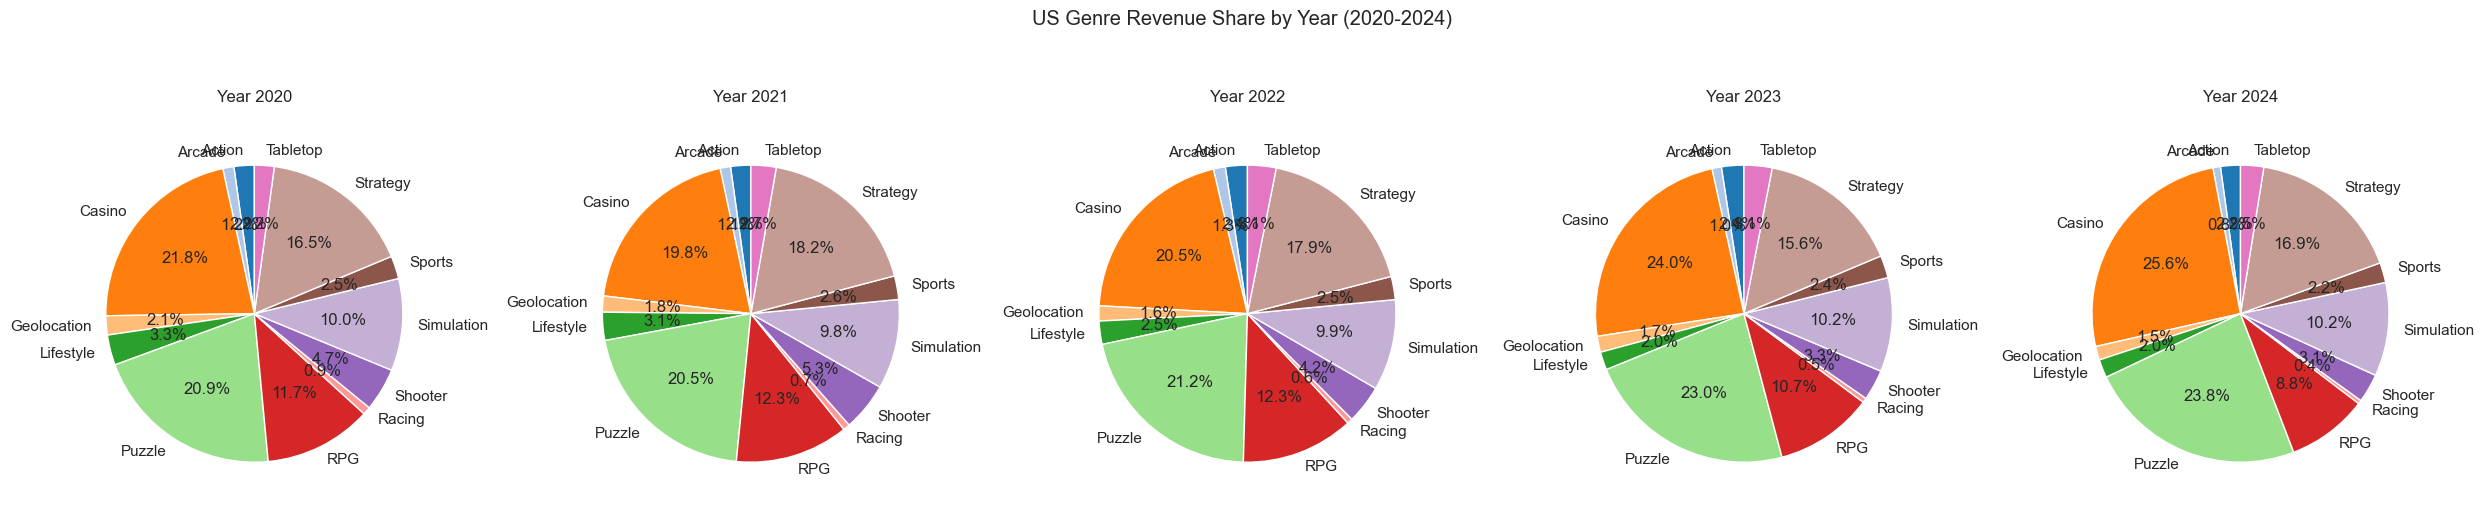

In [21]:
# Changes in the proportion of revenue per category each year (changed to pie chart)
genre_year = us_data.groupby(['Year', 'Game Genre'])['Revenue (Absolute, $)'].sum().reset_index()

# Draw a pie chart for each year
years = genre_year['Year'].unique()
n_years = len(years)
fig, axes = plt.subplots(1, n_years, figsize=(n_years * 5, 5)) 

for i, year in enumerate(years):
    # Extract data for that year
    year_data = genre_year[genre_year['Year'] == year]
    labels = year_data['Game Genre']
    sizes = year_data['Revenue (Absolute, $)']
    
    # Draw a pie chart
    if n_years == 1: 
        ax = axes
    else:
        ax = axes[i]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('tab20', len(labels)))
    ax.set_title(f'Year {year}')
    ax.axis('equal')  

plt.suptitle('US Genre Revenue Share by Year (2020-2024)', y=1.05)
plt.tight_layout()
plt.show()

### TO BE CONTINUED
JP/CN/IN/BR/RU

---

# 📌 PART 4：App Clustering & Genre Correlation [In Progress]

---

<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
C:\Users\selma\AppData\Local\Temp\ipykernel_18892\4220222843.py:15: SyntaxWarning: invalid escape sequence '\$'
  df['RPD (All Time, WW)'] = df['RPD (All Time, WW)'].replace('[\$,]', '', regex=True).astype(float)


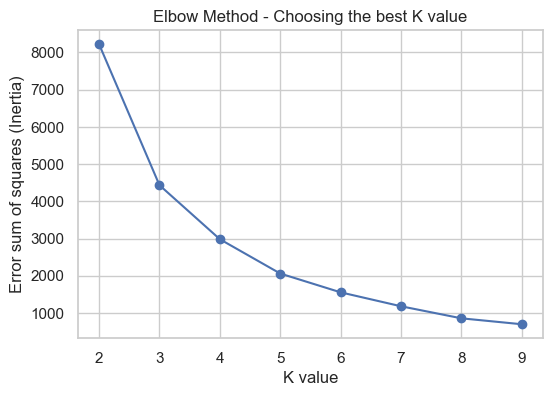

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

revenue_2024 = pd.read_csv(r'C:\Users\selma\Desktop\game_trend\revenue_2024.csv', encoding='utf-16', sep='\t')

df = revenue_2024.copy()

# Select features for clustering (only two key features are used)
features = ['Average DAU (Absolute)', 'RPD (All Time, WW)']

# Process the data, remove non-numeric characters and convert to float
df['RPD (All Time, WW)'] = df['RPD (All Time, WW)'].replace('[\$,]', '', regex=True).astype(float)
df['Average DAU (Absolute)'] = pd.to_numeric(df['Average DAU (Absolute)'], errors='coerce')

# Handling missing values (filling or deleting)
df.dropna(subset=features, inplace=True)

# Standardize Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

# Select the best K value using the Elbow Method
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Diagram
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('K value')
plt.ylabel('Error sum of squares (Inertia)')
plt.title('Elbow Method - Choosing the best K value')
plt.show()

Cluster
2    6252
0     225
3      22
4      10
1       3
Name: count, dtype: int64

==== Cluster 0 ====
                    Unified Name  Average DAU (Absolute)  RPD (All Time, WW)
1                           王者荣耀              12459046.0               35.99
8                      地下城与勇士：起源                134420.0              103.89
9                           和平精英               1842251.0               26.88
35                           逆水寒                487661.0               41.28
36              ドラゴンボールZ ドッカンバトル                900289.0               32.23
39     GODDESS OF VICTORY: NIKKE                745877.0               49.52
44  Jackpot Party - Casino Slots                136222.0               33.27
47                     パズル＆ドラゴンズ                569970.0               95.37
52   Lightning Link Casino Slots                102043.0               48.89
63                捕鱼大作战-街机打鱼游戏王者                 83918.0               97.82

==== Cluster 1 ====
        Unified Name  Avera

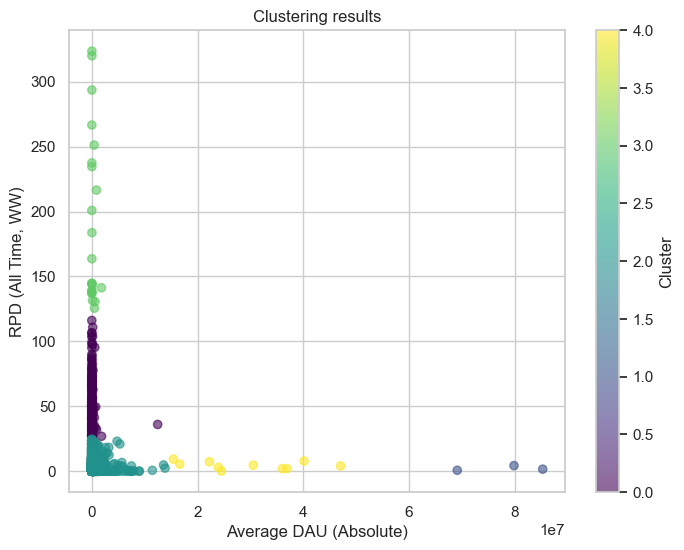

In [23]:
# Select the best K value and perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# View the distribution of apps in each category
print(df['Cluster'].value_counts())

# Displays a list of applications for each cluster category
for cluster in sorted(df['Cluster'].unique()):
    print(f"\n==== Cluster {cluster} ====")
    print(df[df['Cluster'] == cluster][['Unified Name', 'Average DAU (Absolute)', 'RPD (All Time, WW)']].head(10))

# Visualizing clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df['Average DAU (Absolute)'], df['RPD (All Time, WW)'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Average DAU (Absolute)')
plt.ylabel('RPD (All Time, WW)')
plt.title('Clustering results')
plt.colorbar(label='Cluster')
plt.show()


| **Cluster** | **Name** | **Description** |
|------------|---------|----------------|
| **0** | 🎮 Casual Sailors | Low DAU & Low RPD - Mostly free apps or casual games relying on ads. |
| **1** | 🐋 Pay-to-Win Whales | Low DAU & High RPD - Few users, but high spending power (subscription apps or heavy monetization). |
| **2** | 🌍 Traffic Giants | High DAU & Low RPD - Massive user base but low monetization (e.g., TikTok, Instagram). |
| **3** | ⚖ Balanced Warriors | Mid-range DAU & RPD - Well-balanced monetization and user engagement. |
| **4** | 👑 Revenue Kings | High DAU & High RPD - Top revenue-generating apps like AAA games or Netflix. |

# 📌 PART 5： 5. Predictive Analysis [Not Started]